In [1]:
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''데이터 준비 관련 라이브러'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 

In [2]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/drive', force_remount=True)

unset HISTFILE; export PS1="root@8c995f3be1ab-f275e00349754b3282f0064880af1d53: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@8c995f3be1ab-f275e00349754b3282f0064880af1d53: umount -f /content/drive || umount /content/drive; pkill -9 -x drive
umount: /content/drive: no mount point specified.
umount: /content/drive: no mount point specified.
root@8c995f3be1ab-f275e00349754b3282f0064880af1d53: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@8c995f3be1ab-f275e00349754b3282f0064880af1d53: ( while `sleep 0.5`; do if [[ -d "/content/drive" && "$(ls -A /content/drive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 114
root@8c995f3be1ab-f275e00349754b3282f0064880af1d53: cat /tmp/tmpokouhoo5/drive.fifo | head -1 | ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:1

In [3]:
os.chdir('./drive/MyDrive/titanic data/')

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('gender_submission.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age,Cabin,Embarked특성 null값 존재

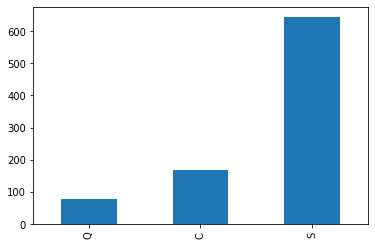

In [8]:
#결측값 처리 : Embarked
train['Embarked'].value_counts(sort=False).plot.bar()

In [9]:
##결측값을 가장 많이 나온 value로 채워줌
train['Embarked'].fillna('S',inplace=True)
test['Embarked'].fillna('S',inplace=True)

In [10]:
#결측값 처리 : Age
median=train['Age'].median()
train['Age'].fillna(median,inplace=True)
test['Age'].fillna(median,inplace=True)

In [11]:
#결측값 처리 : Cabin
train=train.drop('Cabin', axis=1)
test=test.drop('Cabin', axis=1)

In [12]:
#결측값 처리 : Pclass, SibSp,Fare
median=train['Pclass'].median()
train['Pclass'].fillna(median,inplace=True)
test['Pclass'].fillna(median,inplace=True)

median=train['SibSp'].median()
train['SibSp'].fillna(median,inplace=True)
test['SibSp'].fillna(median,inplace=True)

median=train['Fare'].median()
train['Fare'].fillna(median,inplace=True)
test['Fare'].fillna(median,inplace=True)

In [13]:
train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Object type : Name, Sex, Ticket, Embarked


In [14]:
train.apply(lambda x: len(x.unique()))

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [15]:
#텍스트와 범주형 특성 다루기
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [16]:
train['Embarked']=label_encoder.fit_transform(train['Embarked'])
test['Embarked']=label_encoder.transform(test['Embarked'])
train['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [17]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
#성별 숫자로 변환
train['Sex'] = train['Sex'].replace(['female','male'],[0,1])
test['Sex'] = test['Sex'].replace(['female','male'],[0,1])

In [19]:
#name 특성 drop
train=train.drop('Name', axis=1)
test=test.drop('Name', axis=1)

#ticket 특성 drop
train=train.drop('Ticket', axis=1)
test=test.drop('Ticket', axis=1)

#age
counts, bin_dividers = np.histogram(train['Age'], bins = 8)
train['Age'] = pd.factorize(pd.cut(train['Age'],
                                        bins = bin_dividers,
                                        include_lowest=True,
                                        labels = [i for i in range(8)]))[0]
test['Age'] = pd.factorize(pd.cut(test['Age'],
                                        bins = bin_dividers,
                                        include_lowest=True,
                                        labels = [i for i in range(8)]))[0]

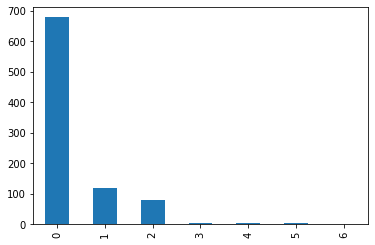

In [20]:
train['Parch'].value_counts(sort=False).plot.bar()

In [21]:
##3보다 큰값은 이상치로 생각하고 다 3으로 바꿔줌
train.loc[train['Parch']>=2,'Parch']=2
test.loc[test['Parch']>=2,'Parch']=2

데이터 세트 분리

In [22]:
x_train=train.drop('Survived',axis=1)
y_train=train[['Survived']]
x_test=test

In [23]:
ss=pp.StandardScaler()
scale_x_train=ss.fit_transform(x_train)
scale_x_test=ss.transform(x_test)

In [24]:
X_train, X_val, Y_train, Y_val = train_test_split(scale_x_train, y_train, 
                                                    stratify=y_train, test_size=0.25,
                                                    random_state = 42)

In [25]:
from sklearn.svm import LinearSVC
lenear_svm=LinearSVC(C=1,loss="hinge")
lenear_svm.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [26]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(lenear_svm, X_val, Y_val, cv=5,scoring='accuracy')
svm_scores.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: Data

0.7981818181818182

In [27]:
y_pred = lenear_svm.predict(x_test)

# **구현 마치고 느낀점**

-pipeline 사용하는게 어색해서 하나하나 처리했는데..    pipeline에 익숙해지기로 했다

-train 데이터값에서 null값이 있는 특성만 처리하는 실수를 범함. test데이터에는 다른 특성에 null값이 있을 수 있는건데..